# MRRVIS: A Visualisation Tool For Reconfigurable Robotics Systems

## Alexander Pasha
### Supervisors: Othon Michail, Terry Payne

In [1]:

from IPython.display import HTML

from mrrvis.env import Environment
from mrrvis.movesets import squaremoves
import numpy as np

%matplotlib inline

In [2]:
# This is the set of instructions to construct the word 'mrrvis from a line of 54 cells'
state_0= np.array([[i,0] for i in range(54)])
moves = {'rotate': squaremoves.rotate, 'push':squaremoves.slide_line}
env= Environment(state_0, 'Square', moveset=moves, connectivity='vertex', )
env.step('rotate',0,'NE')
env.step('push',0,'S')
env.step('push',0,'S')
env.step('push',-1,'W')
env.step('push', [1,0], 'S')
env.step('push',-1,'W')
env.step('push',[3,0],'S')
for i in range(2):
    env.step('push', [5,0], 'S')
    env.step('push', [51-i, 0], 'W')
env.step('push', [5,0],'S')
for i in range(3):
    env.step('push', [6,0], 'S')
    env.step('push', [49-i,0], 'W')


env.step('push', [7,0], 'S')
env.step('push', [46,0], 'W')
env.step('push', [8,0], 'S')
env.step('push', [45,0], 'W')
env.step('push', [7,-1],'S')
env.step('push', [8,0], 'S')
env.step('push', [8,-2], 'S')

for i in range(3):
    env.step('push', [9,0], 'S')
    env.step('push', [44-i,0], 'W')
    
env.step('push', [10,0], 'S')
env.step('push', [41,0], 'W')
env.step('push', [11,0], 'S')
env.step('push', [40,0], 'W')
env.step('push', [10,-1],'S')
env.step('push', [11,0], 'S')
env.step('push', [11,-2], 'S')

env.step('push', [12,0],'S')
env.step('push', [13,0],'S')
env.step('push', [39,0],'W')

env.step('push', [12,-1],'S')
env.step('push', [13,0], 'S')

env.step('push', [12,-2],'S')
env.step('push', [38,0], 'W')
env.step('push', [13,0], 'S')
env.step('push', [37,0], 'W')
for i in range(3):
    env.step('push', [14,0],'S')
    env.step('push', [36-i,0], 'W')
    
env.step('rotate', [14,-2],'NE')
env.step('rotate', [14,-1],'SE')
env.step('push', [14,0],'E')

for i in range(3):
    env.step('push', [17,0],'S')
    env.step('push', [34-i,0], 'W')
for i in range(3):
    env.step('push', [18,0],'S')
    env.step('push', [31-i,0], 'W')
    
env.step('push', [18,-3],'W')
env.step('rotate',[18,-1],'SE')
env.step('rotate',[19,-2],'SW')
env.step('push', [18,-2],'E')

for i in range(2):
    env.step('push', [19,0],'S')
    env.step('push', [28-i,0],'W')
for i in range(2):
    env.step('push', [20,0],'S')
    env.step('push', [26-i,0],'W')
for i in range(3):
    env.step('push', [21,0],'S')
    env.step('push', [24-i,0],'W')
    
env.step('push', [19,-3],'S')
env.step('push', [20,-1],'S')
env.step('push', [20,-3],'S')
env.step('push', [21,-1],'S')
# there are 90 instructions, which is slightly less than nlogn = 54log54 = ~93.5

(<mrrvis.configuration.ConfigurationGraph at 0x7f95a41fe700>, None, None)

## Demonstration of visualisation from a environment history

In [3]:
# HTML(env.render_history(speed=100,save=True, filename='mrrvis.gif'))
HTML(env.render_history(speed=100)) 

## Demonstration that illegal moves throw a warning and do not affect the environment state

91
Square


/Users/alexanderpasha/Documents/COMP702/mrrvis/mrrvis/env.py:98: UserWarning: infeasible action selected
  warnings.warn("infeasible action selected")


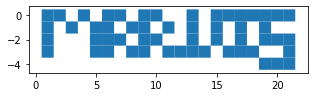

In [4]:
"""This move breaks the connectivity of the graph"""
print(env.t)
env.step('push', [21,0],'E')
# env.render()

env.render(axes=True)

In [5]:
print(env.t)

91


Square


/Users/alexanderpasha/Documents/COMP702/mrrvis/mrrvis/move.py:264: UserWarning: Collision: move infeasible
  warnings.warn('Collision: move infeasible')


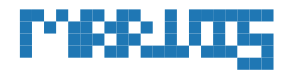

In [6]:
# this move is impossible due to collision
env.step('rotate', [5,-2], 'NE')
env.render()

Square


/Users/alexanderpasha/Documents/COMP702/mrrvis/mrrvis/move.py:294: UserWarning: module not in graph
  warnings.warn('module not in graph')


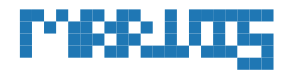

In [7]:
# this move uses a module that doesnt exist
env.step('rotate', [39,20], 'SE')
env.render()

## Demonstration of Configuration graph
a demonstration of terrain representation in 3D

In [10]:
from mrrvis.configuration import ConfigurationGraph
config = ConfigurationGraph('Cube', np.array([[0,0,0],[0,1,0],[1,1,0]]))

In [11]:
print('vertices: \n', config.V)
print('edges: \n', config.E)

vertices: 
 [[0 0 0]
 [0 1 0]
 [1 1 0]]
edges: 
 [{0, 1}, {0, 2}, {1, 2}]


## Demonstration of verification

In [14]:
import copy

Square


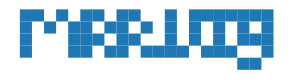

verify:  False


In [15]:
copy_env = copy.deepcopy(env)
copy_env.target_state = env.state
copy_env.revert(1)
copy_env.render()
print('verify: ', copy_env.verify())

Square


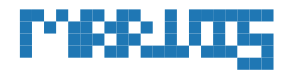

verify:  True


In [16]:
copy_env.step('push', [21,-1],'S')
copy_env.render()
print('verify: ', copy_env.verify())

In [17]:
from mrrvis.geometry_utils import rotate_normal

Square


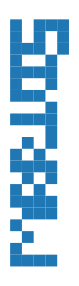

verify:  True


In [18]:
#equality for ConfigurationGraphs is defined as an isomorphism, if an isomorphic relationship between the state
# and the target exists, then we say that the state is the same as the target configuration

copy_env.state.vertices = rotate_normal(copy_env.state.vertices+np.array([164,37]), turns=1, around= [33,44])
copy_env.render()
print('verify: ', copy_env.verify())

## Demonstration of action space

In [4]:
env.action_space

{0: {'rotate': {'NE': None,
   'SE': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa3f5730>,
   'SW': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa3f57c0>,
   'NW': None},
  'push': {'N': None,
   'S': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa3f54f0>,
   'E': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa3f55b0>,
   'W': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa3f52e0>}},
 1: {'rotate': {'NE': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa3f51c0>,
   'SE': None,
   'SW': None,
   'NW': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa4471f0>},
  'push': {'N': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa4470d0>,
   'S': None,
   'E': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa447310>,
   'W': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa4472e0>}},
 2: {'rotate': {'NE': None,
   'SE': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa447370>,
   'SW': <mrrvis.configuration.ConfigurationGraph at 0x7f86fa447460>,
  

In [3]:
env.actions_for_module([1,0])

{'rotate': {'NE': <mrrvis.configuration.ConfigurationGraph at 0x7faa624f1970>,
  'SE': None,
  'SW': <mrrvis.configuration.ConfigurationGraph at 0x7faa60c4ba30>,
  'NW': None},
 'push': {'N': <mrrvis.configuration.ConfigurationGraph at 0x7faa624f19a0>,
  'S': <mrrvis.configuration.ConfigurationGraph at 0x7faa624f1850>,
  'E': <mrrvis.configuration.ConfigurationGraph at 0x7faa624f1130>,
  'W': <mrrvis.configuration.ConfigurationGraph at 0x7faa624f1a00>}}

In [4]:
env.actions_for_module_and_move([1,0], 'rotate')

{'NE': <mrrvis.configuration.ConfigurationGraph at 0x7faa60c4bdf0>,
 'SE': None,
 'SW': <mrrvis.configuration.ConfigurationGraph at 0x7faa624f1250>,
 'NW': None}

Square


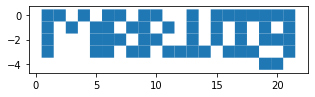

In [20]:
copy_env = copy.deepcopy(env)
copy_env.target_state = copy_env.state
copy_env.revert(1)
copy_env.render(axes=True)

In [21]:
copy_env.actions_for_module([21,-1])

{'rotate': {'NE': <mrrvis.configuration.ConfigurationGraph at 0x7fe68c56ee50>,
  'SE': <mrrvis.configuration.ConfigurationGraph at 0x7fe68c3d8ee0>,
  'SW': None,
  'NW': None},
 'push': {'N': <mrrvis.configuration.ConfigurationGraph at 0x7fe68c49c1f0>,
  'S': <mrrvis.configuration.ConfigurationGraph at 0x7fe68c49c550>,
  'E': <mrrvis.configuration.ConfigurationGraph at 0x7fe68c405730>,
  'W': <mrrvis.configuration.ConfigurationGraph at 0x7fe68c3f65e0>}}

In [22]:
nextstate = copy_env.actions_for_module([21,-1])['push']['S']

reward, done = copy_env.auto_step(nextstate)
print('verify: ', done)


verify:  True


## Demonstration of hex environment

In [23]:
from mrrvis.movesets import hexmoves

Hex


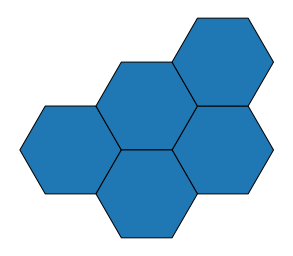

In [24]:
state_0 = [[-1,0,1],[1,-1,0],[0,0,0],[0,-1,1],[1,0,-1]]
hexenv = Environment(state_0,'Hex', moveset={'rotate':hexmoves.rotate})
hexenv.render(ec='black', lw=1)

Hex


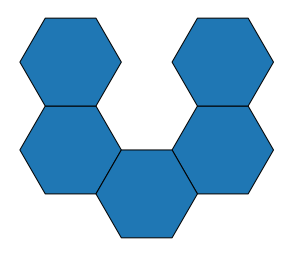

In [25]:
hexenv.step('rotate',[0,0,0],'NW')
hexenv.render(ec='black',lw=1)

## Demonstration of Tri environment

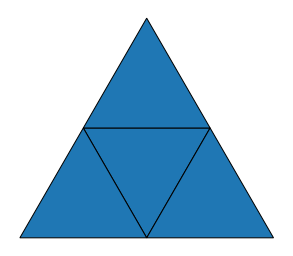

In [2]:
state_0 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
trienv = Environment(state_0, 'Tri')
trienv.render(ec='black', lw=1)


## Demonstration of Cube environment

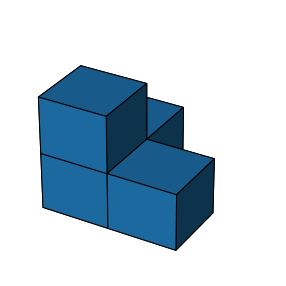

In [3]:
state_0 = [[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
cubeenv = Environment(state_0, 'Cube')
cubeenv.render(ec='black', lw=1)